In [1]:
import os,re,shutil,string,nltk
import tensorflow as tf

In [2]:
from tensorflow.keras import layers, losses

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to C:\Users\Kailash
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import joblib

In [5]:
label = ['Beach', 'City', 'Culture', 'Nature','Snow']

In [6]:
folder_path = './Train'

texts = []
labels = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(subfolder_path, file_name)
                with open(file_path, 'r', encoding="ISO-8859-1") as file:
                    text = file.read()
                texts.append(text)
                labels.append(subfolder)
                
df = pd.DataFrame({'Text': texts, 'Label': labels})
print(df.head())

                                                Text  Label
0  Agadir is a beautiful coastal city located in ...  Beach
1  AgiosNikolaos is a beautiful coastal town loca...  Beach
2  Amalfi Coast in Italy is a stunning coastal pa...  Beach
3  Ao Nang, Thailand is a stunning tropical desti...  Beach
4  Bali, Indonesia is a paradise for tourists. Th...  Beach


In [7]:
folder_path = './Test'

texts_test = []
labels_test = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(subfolder_path, file_name)
                with open(file_path, 'r', encoding="ISO-8859-1") as file:
                    text = file.read()
                texts_test.append(text)
                labels_test.append(subfolder)
                
df_test = pd.DataFrame({'Text': texts_test, 'Label': labels_test})
print(df_test.head())

                                                Text  Label
0  About Agadir Soak up the sun on the well-maint...  Beach
1  About Greece Greece is one of those rare place...  Beach
2  About Anguilla. What makes Anguilla's beaches ...  Beach
3  About Ao Nang Packed with all the amenitiesâ...  Beach
4  Visitors can hike, paddle, sail, or cruise to ...  Beach


In [8]:
words = df['Label']
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Print the word counts
for word, count in word_counts.items():
    print(f"{word}: {count}")

Beach: 99
City: 96
Culture: 94
Nature: 100
Snow: 89


In [9]:
words = df_test['Label']
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Print the word counts
for word, count in word_counts.items():
    print(f"{word}: {count}")

Beach: 25
City: 25
Culture: 19
Nature: 30
Snow: 22


In [10]:
def print_plot(index):
    example = df[df.index == index][['Text', 'Label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [11]:
rep_by_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbol = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = rep_by_space.sub(' ',text)
    text = bad_symbol.sub('',text)
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

df['Text'] = df['Text'].apply(clean_text)
print_plot(10)

brighton popular seaside town south coast england known vibrant atmosphere stunning beaches diverse culture tourist youll find plenty see exploring historic lanes filled independent shops cafes enjoying iconic pier amusement park legendary brighton palace pier mustvisit thrilling rides traditional seaside entertainment vibrant nightlife scene also highlight numerous bars clubs live music venues choose overall brighton fun welcoming destination something everyone enjoy
Tag: Beach


In [12]:
x = df.Text
y = df.Label
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)

In [13]:
nb = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',MultinomialNB()),
              ])
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_prob = nb.predict_proba(x_test)
print('accuracy:',accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred,target_names=label))
joblib.dump(nb, "pipeline.pkl")

accuracy: 0.8541666666666666
              precision    recall  f1-score   support

       Beach       0.75      0.95      0.84        19
        City       0.82      0.82      0.82        22
     Culture       1.00      0.69      0.81        16
      Nature       0.90      0.90      0.90        21
        Snow       0.89      0.89      0.89        18

    accuracy                           0.85        96
   macro avg       0.87      0.85      0.85        96
weighted avg       0.87      0.85      0.85        96



['pipeline.pkl']

In [14]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('clf',SGDClassifier(loss = 'log',alpha=1e-3,random_state=30,max_iter=5,tol=None)),
               ])
sgd.fit(x_train,y_train)

y_pred = sgd.predict(x_test)
print('accuracy:',accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred,target_names=label))

accuracy: 0.8645833333333334
              precision    recall  f1-score   support

       Beach       0.77      0.89      0.83        19
        City       0.79      0.86      0.83        22
     Culture       1.00      0.75      0.86        16
      Nature       0.95      0.90      0.93        21
        Snow       0.89      0.89      0.89        18

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.87        96
weighted avg       0.88      0.86      0.87        96



In [15]:
from sklearn.calibration import CalibratedClassifierCV

In [16]:
ccc = Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('clf',CalibratedClassifierCVlassifierCV(SGDClassifier(loss = 'hinge',alpha=1e-3,random_state=30,max_iter=5,tol=None))),
               ])
ccc.fit(x_train,y_train)

y_pred = ccc.predict(x_test)
print('accuracy:',accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred,target_names=label))

accuracy: 0.8333333333333334
              precision    recall  f1-score   support

       Beach       0.74      0.74      0.74        19
        City       0.76      0.86      0.81        22
     Culture       0.87      0.81      0.84        16
      Nature       0.90      0.86      0.88        21
        Snow       0.94      0.89      0.91        18

    accuracy                           0.83        96
   macro avg       0.84      0.83      0.84        96
weighted avg       0.84      0.83      0.83        96



In [17]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect',CountVectorizer()),
                   ('tfidf',TfidfTransformer()),
                   ('clf',LogisticRegression(n_jobs=1,C=1e5)),
                  ])
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred,target_names=label))
joblib.dump(logreg, "logreg.pkl")

Accuracy: 0.8229166666666666
              precision    recall  f1-score   support

       Beach       0.74      0.74      0.74        19
        City       0.73      0.86      0.79        22
     Culture       0.86      0.75      0.80        16
      Nature       0.90      0.86      0.88        21
        Snow       0.94      0.89      0.91        18

    accuracy                           0.82        96
   macro avg       0.83      0.82      0.82        96
weighted avg       0.83      0.82      0.82        96



['logreg.pkl']

In [18]:
text_sample = ["The sandy coast of Goa is perfect for reclining by the sea. Nestle into a cushioned chair at a beach shack and savor a curry while you sip a Kingfisher beer, watching the sun slip lazily below the horizon. In Old Goa, the beautiful Basilica of Bom Jesus is a UNESCO World Heritage Site and a fine example of baroque architecture. Visit during Christmastime to experience a fantastic religious and cultural mash-up of East and West."]
pred_label_1 = nb.predict(text_sample)
pred_label_2 = logreg.predict(text_sample)
pred_label_x = nb.predict_proba(text_sample)
pred_label_y = logreg.predict_proba(text_sample)
pred_label_z = sgd.predict_proba(text_sample)
pred_label_z1 = ccc.predict_proba(text_sample)
print(pred_label_z1)
print(pred_label_z)
print(pred_label_y)
print(pred_label_x)

[[0.46407243 0.05766777 0.24655131 0.21248747 0.01922101]]
[[0.32350238 0.13861892 0.26901189 0.18552893 0.08333787]]
[[0.71693786 0.00819176 0.16850693 0.10512231 0.00124114]]
[[0.33645397 0.17268854 0.22567487 0.16277273 0.10240989]]


In [19]:
label

['Beach', 'City', 'Culture', 'Nature', 'Snow']

In [20]:
print(pred_label_1)
print(pred_label_2)

['Beach']
['Beach']


---

In [21]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D, LSTM, Flatten, Reshape
from keras.preprocessing import text, sequence
from keras.optimizers import Adam
from keras import utils

In [22]:
train_text = df['Text']
train_label = df['Label']
test_text = df_test['Text']
test_label = df_test['Label']

In [23]:
print(set(train_label))
print(set(test_label))

{'Snow', 'Culture', 'Beach', 'City', 'Nature'}
{'Snow', 'Culture', 'Beach', 'City', 'Nature'}


In [24]:
max_words = 1000
max_length = 1000
tokenize = text.Tokenizer(num_words=max_words,char_level=False)
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [25]:
encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)
num_classes = np.max(y_train)+1
y_train = utils.to_categorical(y_train,num_classes)
y_test = utils.to_categorical(y_test,num_classes)
batch_size = 32
embedding_dim = 32

In [26]:
model_c = Sequential()

model_c.add(Conv1D(8,kernel_size=3,activation="relu",input_shape=(max_words,1)))
model_c.add(MaxPooling1D(pool_size=2))
model_c.add(Dropout(0.2))
'''
model_c.add(Conv1D(16,kernel_size=3,activation="relu",input_shape=(max_words,1)))
model_c.add(MaxPooling1D(pool_size=2))
model_c.add(Dropout(0.2))
'''
model_c.add(Conv1D(64,kernel_size=3,activation="relu",input_shape=(max_words,1)))
model_c.add(MaxPooling1D(pool_size=2))
model_c.add(Dropout(0.2))
'''
model_c.add(Conv1D(128,kernel_size=3,activation="relu",input_shape=(max_words,1)))
model_c.add(MaxPooling1D(pool_size=2))
model_c.add(Dropout(0.2))
model_c.add(Conv1D(256,kernel_size=3,activation="relu",input_shape=(max_words,1)))
model_c.add(MaxPooling1D(pool_size=2))
'''
model_c.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_c.add(GlobalMaxPooling1D())
'''
model_c.add(Dropout(0.5))
model_c.add(Flatten())
model_c.add(Reshape((max_words,256)))
model_c.add(LSTM(32,return_sequences=True))
model_c.add(LSTM(32))
'''
model_c.add(Dense(128))
model_c.add(Activation('relu'))
model_c.add(Dropout(0.7))
'''
model_c.add(Dense(64))
model_c.add(Activation('relu'))
model_c.add(Dropout(0.7))
'''
model_c.add(Dense(32))
model_c.add(Activation('relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(num_classes,activation="sigmoid"))

optimizer = Adam(learning_rate=0.001)
model_c.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model_c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 8)            32        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 8)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 499, 8)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 64)           1600      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 248, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 248, 64)           0

In [29]:
history = model_c.fit(x_train,y_train,batch_size=batch_size,epochs = 10,verbose=1,validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 8s 327ms/step - loss: 1.6241 - accuracy: 0.1937 - val_loss: 1.6529 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 3s 276ms/step - loss: 1.5956 - accuracy: 0.2147 - val_loss: 1.7101 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 3s 276ms/step - loss: 1.5812 - accuracy: 0.2827 - val_loss: 1.7888 - val_accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 3s 250ms/step - loss: 1.5695 - accuracy: 0.2435 - val_loss: 1.8959 - val_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 3s 250ms/step - loss: 1.5481 - accuracy: 0.2749 - val_loss: 2.0840 - val_accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 3s 247ms/step - loss: 1.5418 - accuracy: 0.2696 - val_loss: 2.1597 - val_accuracy: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 3s 243ms/step - loss: 1.5264 - accuracy: 0.2565 - val_loss: 2.2543 - val

In [28]:
score = model_c.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:',score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 57ms/step - loss: 1.6088 - accuracy: 0.1818
Test loss: 1.6088290214538574
Test accuracy: 0.1818181872367859


In [29]:
text_sample = ["The sandy coast of Goa is perfect for reclining by the sea. Nestle into a cushioned chair at a beach shack and savor a curry while you sip a Kingfisher beer, watching the sun slip lazily below the horizon. In Old Goa, the beautiful Basilica of Bom Jesus is a UNESCO World Heritage Site and a fine example of baroque architecture. Visit during Christmastime to experience a fantastic religious and cultural mash-up of East and West."]
tokenize.fit_on_texts(text_sample)
text_sample = tokenize.texts_to_matrix(text_sample)

In [30]:
pred_label_3 = model_c.predict(text_sample)
print(pred_label_3)

1/1 [==============================] - 0s 387ms/step
[[0.50056404 0.4983857  0.4981679  0.5015116  0.504509  ]]


In [31]:
label

['Beach', 'City', 'Culture', 'Nature', 'Snow']

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

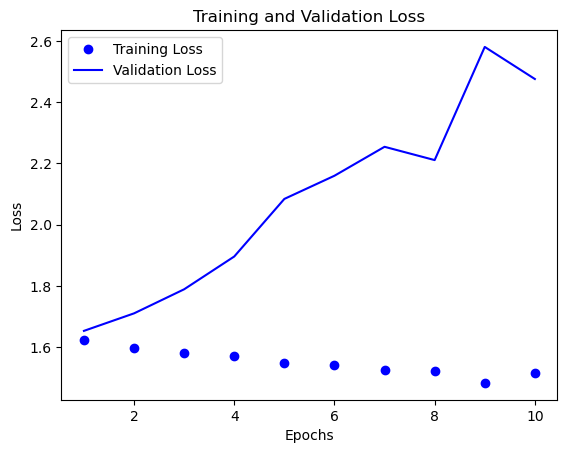

In [35]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo',label = 'Training Loss')
plt.plot(epochs, val_loss,'b',label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

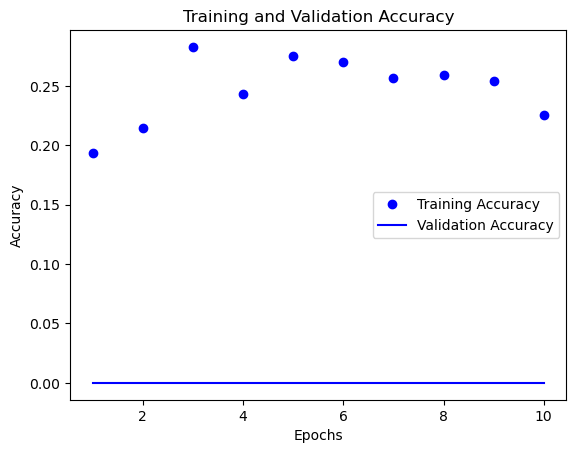

In [36]:
plt.plot(epochs, acc, 'bo',label = 'Training Accuracy')
plt.plot(epochs, val_acc,'b',label = 'Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
text_1 = ["Iceland is a Nordic island country located in the North Atlantic, known for its stunning natural landscapes, including glaciers, hot springs, and geysers. It has a population of around 360,000 people, making it the most sparsely populated country in Europe. The capital city of Iceland is Reykjavik.Iceland has a subarctic climate, with long winters and short summers. The country is situated on the Mid-Atlantic Ridge, a geological boundary where two tectonic plates meet, resulting in a unique landscape of volcanic activity and geothermal features. Iceland is known for its outdoor activities, such as hiking, skiing, and whale watching, as well as its vibrant cultural scene, including music festivals and art exhibitions. Icelandic cuisine is known for its fresh seafood, lamb, and dairy products, as well as unique dishes like fermented shark and smoked lamb.The country has a highly developed economy, with a focus on fishing, tourism, and renewable energy. Iceland is also known for its strong social welfare system and progressive values, including equal rights for women and LGBTQ+ individuals.Overall, Iceland is a fascinating country with a unique culture and stunning natural beauty, making it a popular destination for travelers from around the world."]
tokenize.fit_on_texts(text_1)
text_1 = tokenize.texts_to_matrix(text_1)
pred_label_10 = model_c.predict(text_1)

1/1 [==============================] - 0s 47ms/step


In [38]:
print(pred_label_10)

[[0.56197935 0.5633768  0.53894377 0.5331133  0.28608543]]


In [47]:
folder_path = './Train'

texts = []
labels = []
file_names = []
probabilities = []  
np.set_printoptions(precision=6, suppress=True)
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(subfolder_path, file_name)
                with open(file_path, 'r', encoding="ISO-8859-1") as file:
                    text = file.read()
                texts.append(text)
                labels.append(subfolder)
                file_names.append(file_name)
                
                proba = logreg.predict_proba([text])[0]
                probabilities.append(proba)
                
df = pd.DataFrame({'Text': texts, 'Label': labels, 'File_Name': file_names, 'Probabilities': probabilities})
print(df.head())

                                                Text  Label  \
0  Agadir is a beautiful coastal city located in ...  Beach   
1  AgiosNikolaos is a beautiful coastal town loca...  Beach   
2  Amalfi Coast in Italy is a stunning coastal pa...  Beach   
3  Ao Nang, Thailand is a stunning tropical desti...  Beach   
4  Bali, Indonesia is a paradise for tourists. Th...  Beach   

                  File_Name                                      Probabilities  
0        Agadir_Morocco.txt  [0.1077773474553823, 0.8909718768190242, 0.000...  
1  AgiosNikolaos_Greece.txt  [0.9998764369221007, 1.1826078169396237e-05, 7...  
2     AmalfiCoast_Italy.txt  [0.9999401513335537, 9.906577744946488e-06, 1....  
3       AoNang_Thailand.txt  [0.999818762283659, 9.121662757148821e-05, 6.7...  
4        Bali_Indonesia.txt  [0.09705383964782384, 0.7289126580843109, 0.09...  


In [93]:
df.to_csv("probability.csv",index=False)

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('probability.csv')

# Create a dictionary of places and their classification probabilities
places = {}
for index, row in df.iterrows():
    index = row['Index']
    place_name = row['File_Name']
    probabilities = np.array([row['P_Beach'], row['P_City'], row['P_Culture'], row['P_Nature'], row['P_Snow']])
    label = row['Label']
    if label not in places:
        places[label] = {}
    places[label][place_name] = probabilities

# Get input from the user
input_places = []
for i in range(3):
    place = input(f'Enter favorite place {i+1}: ')
    input_places.append(place)

Enter favorite place 1:  Taipei, Taiwan is a vibrant and exciting city that offers a perfect blend of modernity and tradition to tourists. It's famous for its beautiful parks, delicious food, and bustling night markets. Visitors can soak up the rich culture of the city by visiting its many temples, including the famous Longshan Temple. Taipei 101, one of the tallest buildings in the world, offers breathtaking views of the city. The National Palace Museum has an extensive collection of Chinese art and is a must-visit for history buffs. With excellent public transportation, friendly locals, and a laid-back atmosphere, Taipei is an ideal destination for a memorable vacation.
Enter favorite place 2:  Da Nang is a vibrant coastal city in central Vietnam. It is a popular tourist destination with beautiful beaches, charming architecture, and a rich culture. The city is home to some of the best seafood restaurants in the country, which serve delicious local dishes like banh xeo and mi quang. V

In [34]:
df.head()

,Index,Text,Label,File_Name,P_Beach,P_City,P_Culture,P_Nature,P_Snow
0,1,Agadir is a beautiful coastal city located in ...,Beach,Agadir Morocco.txt,0.107777,0.890972,0.000546,0.000255,0.000450
1,2,AgiosNikolaos is a beautiful coastal town loca...,Beach,AgiosNikolaos Greece.txt,0.999876,0.000012,0.000077,0.000017,0.000018
2,3,Amalfi Coast in Italy is a stunning coastal pa...,Beach,AmalfiCoast Italy.txt,0.999940,0.000010,0.000019,0.000017,0.000013
3,4,"Ao Nang, Thailand is a stunning tropical desti...",Beach,AoNang Thailand.txt,0.999819,0.000091,0.000007,0.000074,0.000009
4,5,"Bali, Indonesia is a paradise for tourists. Th...",Beach,Bali Indonesia.txt,0.097054,0.728913,0.092032,0.076028,0.005973


In [49]:
# Extract the corresponding probability values for each input place
input_probabilities = []
for place in input_places:
    text = [place]
    input_probabilities.append(logreg.predict_proba(text))

In [50]:
    
# Calculate cosine similarity between input places and all places in the dictionary
similarities = {}
'''
for label in places:
    for place in places[label]:
        if place not in similarities:
            similarity = cosine_similarity(input_probabilities, [places[label][place]])[0]
            similarities[place] = similarity
for i in places:
    similarity = cosine_similarity(input_probabilities, probabilities)

# Sort the cosine similarity scores in descending order and select top 5 recommendations
recommendations = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:5]
print(f'Top 5 recommended places: {[r[0] for r in recommendations]}')
'''

"\nfor label in places:\n    for place in places[label]:\n        if place not in similarities:\n            similarity = cosine_similarity(input_probabilities, [places[label][place]])[0]\n            similarities[place] = similarity\nfor i in places:\n    similarity = cosine_similarity(input_probabilities, probabilities)\n\n# Sort the cosine similarity scores in descending order and select top 5 recommendations\nrecommendations = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:5]\nprint(f'Top 5 recommended places: {[r[0] for r in recommendations]}')\n"

In [51]:
print(input_probabilities)

[array([[0.      , 0.999962, 0.000037, 0.000001, 0.      ]]), array([[0.000027, 0.999885, 0.000061, 0.000022, 0.000005]]), array([[0.999701, 0.000008, 0.000041, 0.000241, 0.00001 ]])]


In [52]:
prob_in = []
j = 0
for i in input_probabilities:
    prob_in.append(i[j][0])
    j+=1

IndexError: index 1 is out of bounds for axis 0 with size 1

In [53]:
prob_in = [list(input_probabilities[0][0]),list(input_probabilities[1][0]),list(input_probabilities[2][0])]

In [54]:
prob_in

[[2.5987313793539035e-07,
  0.9999620564124091,
  3.678757904286416e-05,
  6.57820560077745e-07,
  2.3831484980034974e-07],
 [2.6922610494157554e-05,
  0.9998846039885539,
  6.13052428774125e-05,
  2.222962096868446e-05,
  4.938537105866407e-06],
 [0.999700612211529,
  7.5300659268757384e-06,
  4.068222798794992e-05,
  0.0002414604373522623,
  9.715057203862884e-06]]

In [55]:
similarities = cosine_similarity(prob_in, df[['P_Beach', 'P_City', 'P_Culture', 'P_Nature', 'P_Snow']])
print(similarities)
print(similarities.shape)

[[0.992763 0.000012 0.00001  ... 0.000001 0.       0.      ]
 [0.992766 0.000039 0.000037 ... 0.000006 0.000005 0.000005]
 [0.120098 1.       1.       ... 0.000028 0.00001  0.000013]]
(3, 478)


In [56]:
top5_indices = np.argsort(similarities, axis=1)[:, -5:]
print(top5_indices)

[[110 133 140 193 183]
 [119 178 145 120 121]
 [ 81  41  76  74  45]]


In [57]:
top5_filenames = df.iloc[top5_indices.flatten()]['File_Name'].values.reshape(top5_indices.shape)
print(top5_filenames)

[['Beijing China  ' 'Jakarta Indonesia  ' 'Kolkata India  '
  'Yerevan Armenia  ' 'Taipei Taiwan  ']
 ['Chennai India  ' 'Siem Reap Cambodia ' 'London United Kingdom '
  'Chiang Mai Thailand ' 'Da Nang Vietnam ']
 ['SanDiego USA ' 'Krabi Thailand ' 'RioGrande PuertoRico '
  'Railay Thailand ' 'Maldives Maldives ']]


In [170]:
if(df['Index'] == 43) == True:
    print(df['File_Name'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
top5_filenames = []
for row_indices in top5_indices:
    filenames = []
    for index in row_indices:
        filenames.append(df.iloc[index]['File_Name'])
    top5_filenames.append(filenames)
print(top5_filenames)

[['Beijing China  ', 'Jakarta Indonesia  ', 'Kolkata India  ', 'Yerevan Armenia  ', 'Taipei Taiwan  '], ['Chennai India  ', 'Siem Reap Cambodia ', 'London United Kingdom ', 'Chiang Mai Thailand ', 'Da Nang Vietnam '], ['SanDiego USA ', 'Krabi Thailand ', 'RioGrande PuertoRico ', 'Railay Thailand ', 'Maldives Maldives ']]


In [59]:
print(top5_filenames[0][0],"\n",top5_filenames[1][0],"\n",top5_filenames[2][0])

Beijing China   
 Chennai India   
 SanDiego USA 


In [60]:
print(list((labels)))
print(top5_filenames[0])

['Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'Beach', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'Cit

In [61]:
for k in range(len(top5_filenames)):
    print(top5_filenames[k][4])

Taipei Taiwan  
Da Nang Vietnam 
Maldives Maldives 
